In [1]:
# ccdefault Data Used
# All random state is 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [3]:
# Import data

f = open('E:\大学相关\硕士相关\IE517\Module 7\ccdefault.csv')
df = pd.read_csv(f)
X = df.iloc[:, 1:24]
y = df.iloc[:, 24]
print(X.shape, y.shape)

(30000, 23) (30000,)


In [4]:
# Random Forest
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27000, 23) (27000,)
(3000, 23) (3000,)


1 Complete!
2 Complete!
3 Complete!
4 Complete!
5 Complete!
6 Complete!
7 Complete!
8 Complete!
9 Complete!
10 Complete!
11 Complete!
12 Complete!
13 Complete!
14 Complete!
15 Complete!
16 Complete!
17 Complete!
18 Complete!
19 Complete!
20 Complete!
21 Complete!
22 Complete!
23 Complete!
24 Complete!
25 Complete!
26 Complete!
27 Complete!
28 Complete!
29 Complete!
30 Complete!
31 Complete!
32 Complete!
33 Complete!
34 Complete!
35 Complete!
36 Complete!
37 Complete!
38 Complete!
39 Complete!
40 Complete!
41 Complete!
42 Complete!
43 Complete!
44 Complete!
45 Complete!
46 Complete!
47 Complete!
48 Complete!
49 Complete!
50 Complete!
Results of 10-fold cross-validation for N_range 
N_estimators: 1, Accuracy: 0.7255185185185186, Time: 0.8410833000000011 s
N_estimators: 2, Accuracy: 0.7861111111111111, Time: 1.523612 s
N_estimators: 3, Accuracy: 0.7702962962962963, Time: 2.1189418999999994 s
N_estimators: 4, Accuracy: 0.7942222222222222, Time: 2.581651800000003 s
N_estimators: 5, Accuracy

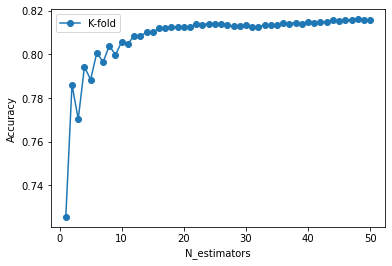

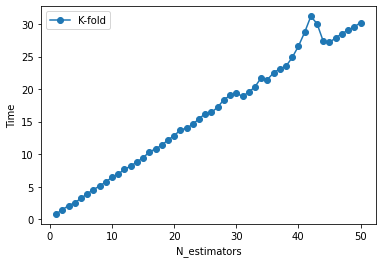

In [5]:
# Random Forest
# Cross-validation

N = 50
range_n = range(1, N + 1)

ascores_train = []
time_train = []

for n_i in range_n:
    
    start_i = time.perf_counter()
    
    forest_i = RandomForestClassifier(n_estimators = n_i, random_state = 1)
    
    acscore_i = cross_val_score(forest_i, X_train, y_train, cv = 10)
    
    end_i = time.perf_counter()
    
    mean_train_i = np.mean(acscore_i)
    ascores_train.append(mean_train_i)
    
    time_train_i = end_i - start_i
    time_train.append(time_train_i)
    
    print(str(n_i) + " Complete!")


print('Results of 10-fold cross-validation for N_range ')
for i in range(len(ascores_train)):
    print("N_estimators: " + str(i + 1) + ", Accuracy: " + str(ascores_train[i]) + ", Time: " + str(time_train[i]) + " s")

plt.plot(range_n, ascores_train, 'o-', label = 'K-fold')
plt.legend()
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range_n, time_train, 'o-', label = 'K-fold')
plt.legend()
plt.xlabel('N_estimators')
plt.ylabel('Time')
plt.show()

In [6]:
# Random Forest
# Best N_estimators is 48

Best_N = 48

In [7]:
# Random Forest
# Accuracy

feat_labels = df.iloc[:, 1:25].columns[1:]

forest = RandomForestClassifier(n_estimators = Best_N, random_state = 1)

forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)
acscore_train = accuracy_score(y_train, y_pred_train)
acscore_test = accuracy_score(y_test, y_pred_test)

print("Accuracy in sample: " + str(acscore_train))
print("Accuracy out of sample: " + str(acscore_test))

Accuracy in sample: 0.9985185185185185
Accuracy out of sample: 0.818


 1) PAY_2                          0.101177
 2) PAY_0                          0.067833
 3) BILL_AMT2                      0.060513
 4) SEX                            0.059027
 5) BILL_AMT3                      0.053124
 6) BILL_AMT4                      0.052075
 7) PAY_AMT2                       0.051359
 8) PAY_AMT1                       0.051105
 9) BILL_AMT5                      0.050276
10) BILL_AMT6                      0.049524
11) PAY_AMT3                       0.047550
12) PAY_AMT4                       0.046696
13) DEFAULT                        0.045890
14) PAY_3                          0.044026
15) PAY_AMT5                       0.043957
16) PAY_AMT6                       0.043509
17) PAY_4                          0.026876
18) PAY_5                          0.025539
19) MARRIAGE                       0.020324
20) PAY_6                          0.017648
21) BILL_AMT1                      0.016350
22) AGE                            0.013580
23) EDUCATION                   

(-1.0, 23.0)

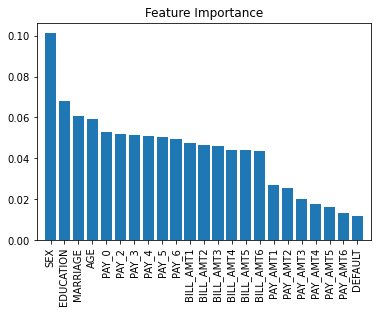

In [8]:
# Random Forest
# Feature Importances

importances=forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation = 90)
plt.xlim([-1, X_train.shape[1]])

In [9]:
print("My name is Jingfan Xing")
print("My NetID is: jingfan5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jingfan Xing
My NetID is: jingfan5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
